First I imported the libraries that I knew I would be using such as Pandas, Numpy, Seaborn/MatPlotLib, Scipy and SciKitLearn. These libraries will enable me to import, clean, vizualize, and create a model from the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
train_df = pd.read_csv(r"C:\Users\Preston Overson\Documents\Python Scripts\Data\IOWA_HOUSING_TRAIN.csv")
test_df = pd.read_csv(r"C:\Users\Preston Overson\Documents\Python Scripts\Data\IOWA_HOUSING_TEST.csv")

The next few lines of code are used to familiarize myself with the data. I use info to understand what type of variables (string, numeric) are included in the data set, and get a rough idea of missing values.

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

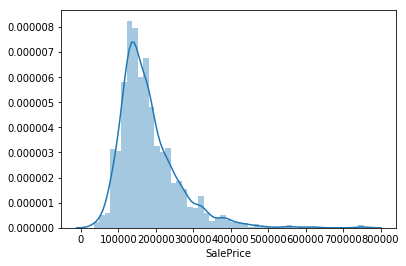

In [3]:
sns.distplot(train_df['SalePrice'])

It looks like there are a lot of variables with missing values, and a lot of string data that I may later make into dummy variables. For now I'm going to start simple.

The first model I am just going to hand pick a few features that are already numeric, and that intuitively should have a large impact on house price (Lot Area, Overall Quality, Year built, Above grade ground living area). Below I am checking to make sure that there is some correlation, if there is correlation, I will add it as a feature in my intial model. Once I have this basic bare bones regression model, I will build on it by adding/creating new features and using more advanced algorithms.

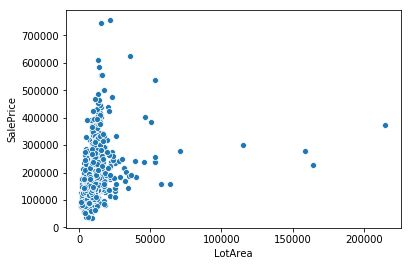

In [4]:
#Scatter plots of the variables I am interested in
sns.scatterplot(x=train_df['LotArea'], y=train_df['SalePrice'])

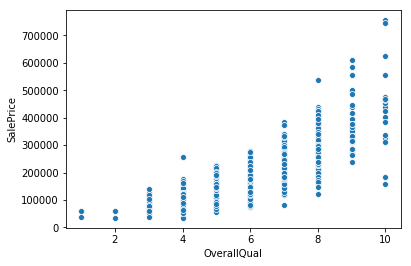

In [5]:
sns.scatterplot(x=train_df['OverallQual'], y=train_df['SalePrice'])

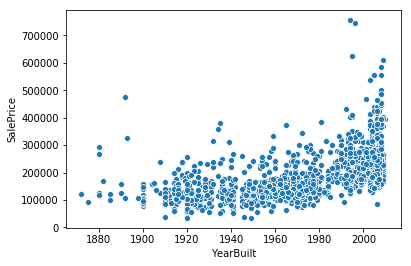

In [6]:
sns.scatterplot(x=train_df['YearBuilt'], y=train_df['SalePrice'])

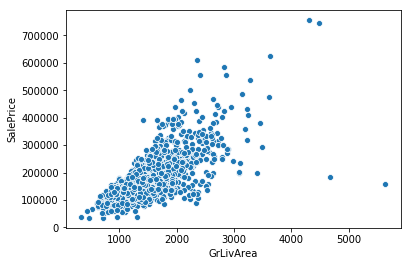

In [7]:
sns.scatterplot(x=train_df['GrLivArea'], y=train_df['SalePrice'])

Out of the four variables it looks like all of them have some sort of correlation with sale price. 

In [8]:
first_df = train_df[['LotArea','OverallQual','YearBuilt','GrLivArea']].copy()

In [9]:
scaler = StandardScaler()
scaler.fit(first_df)
scaled_df = scaler.transform(first_df)
first_df['SalePrice'] = train_df['SalePrice']

In [10]:
target = first_df['SalePrice']
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(scaled_df, target)
predictions = linear_regression_model.predict(scaled_df)
mse = mean_squared_error(target, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 39748.16036435509


In [11]:
first_df = test_df[['LotArea','OverallQual','YearBuilt','GrLivArea']].copy()
scaler = StandardScaler()
scaler.fit(first_df)
scaled_df = scaler.transform(first_df)
predictions = linear_regression_model.predict(scaled_df)

In [12]:
Id = test_df['Id']
submission = pd.DataFrame({'Id':Id,'SalePrice':predictions})
submission.to_csv("submission.csv",index=False)

In [13]:
submission.head(3)

,Id,SalePrice
0,1461,115857.501605
1,1462,171488.621112
2,1463,183790.977469


I was able to submit this first very crude model into kaggle and scored 0.734 which is pretty terrible. I think from here I will add some features and also try some more advanced machine learning tools.

Below I look at all of the numeric data correlation with a helpful tool from seborn called heatmap

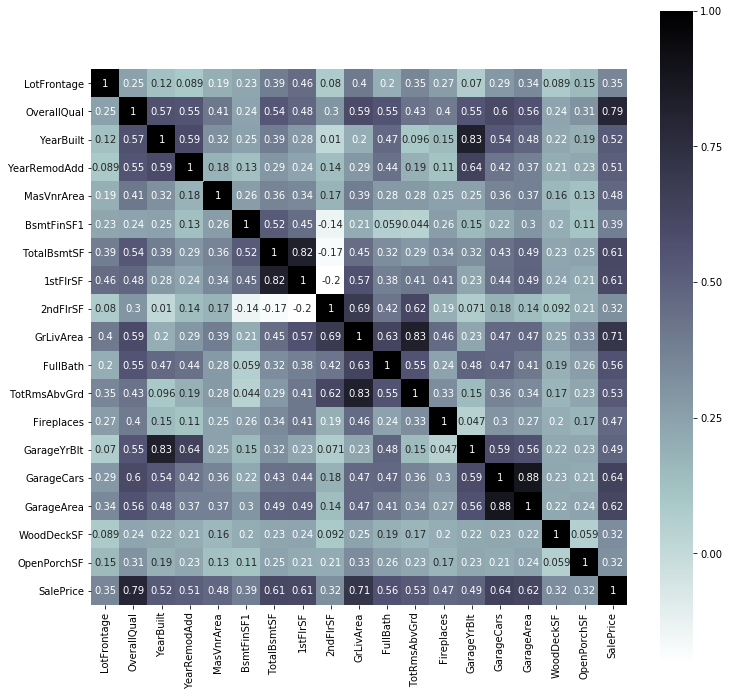

In [14]:
corr_train = train_df.corr() #calculate correlation coefficients
best_corr = corr_train.index[abs(corr_train["SalePrice"])>0.3] #make subset of correlation values greater than .3
fig, ax = plt.subplots(figsize=(12,12))  #adjust size (it was a bit small the first time through)
sns.heatmap(train_df[best_corr].corr(), square = True, annot = True,  cmap="bone_r")

In the plot above there are we see 18 other numerical data that I can add to the model. At this point I am also going to merge the data for the test and train sets so that I can edit both at the same time while I add/create features, impute values and drop variables.

In [15]:
y = train_df['SalePrice']
data = pd.concat((train_df.drop('SalePrice', axis = 'columns'), test_df)).reset_index(drop = True)
data = data.drop('Id', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

Looking at the info about the train data set, right off the bat there are some variables that have a lot of missing values and could just be dropped miscFeature Fence PoolQC FireplaceQU and Alley. So I will also drop those from the data before I start imputing missing values. I'm dropping these because they have a lot of missing values, and after looking at the documentation for the data, they intuitevely dont seem like they will have a lot of predictive power.

In [16]:
data = data.drop('Alley', axis = 1)
data = data.drop('FireplaceQu', axis = 1)
data = data.drop('PoolQC', axis = 1)
data = data.drop('Fence', axis = 1)
data = data.drop('MiscFeature', axis = 1)

Now I need to fill in the missing values for the other features so that I can add them to the model, also looking at the training datsale price histogram above, we may also have better results if we make the target log price, to reduce the long right hand tail, and make the target look more normal.

In [17]:
#Applying log transformation to target
y = np.log1p(y)

The numeric variables shown to have correlation, that also have missing values are MasVnrArea BsmtFinSF1 TotalBsmtSF GarageYrBlt GarageCars GarageArea. Some are randomly missing a lot, but others like the masonry garage and basement variables are just missing one observation. I thik in these cases the house probably didnt have a garage or basement, for these variables I will fill in 0.  Lot frontage and GarageYrBlt are more complex because they are missing more values, and probably vary neigborhood to neigboorhood. I will fill these in with the median for the neighborhood 

In [18]:
#fill with zero
fill_zero = ['BsmtFinSF1', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'MasVnrArea', 'BsmtUnfSF', 'BsmtFinSF2', 
             'BsmtFullBath', 'BsmtHalfBath']
for col in fill_zero:
    data[col] = data[col].fillna(0)

In [19]:
#fill with neighborhood median
fill_nb_median = ['LotFrontage', 'GarageYrBlt']
for col in fill_nb_median:
    data[col] = data.groupby("Neighborhood")[col].transform(lambda x: x.fillna(x.median()))

After loooking at what other people did in the kernels, I think the categorical data can really help to increase the effectiveness of the model. So I am going to fill in the missing categorical data and then get dummies. Somne of the categorical data is missing because the characteristic isnt applicable to the house, like GarageFinish, if the house doesn't have a garage. Other values are just randomly missing. Looking at the data description [here](https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/205873/data_description.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1551632165&Signature=kCyUypqryx8%2BYfcaUgdYClkN5LzJ9Hpyi8pJOaViMejC8JwUel4komz9GI9pbyDNZHMdnqcO8GqO8nKru9hEZQ9m7k%2BNIbhmBpx8d8NgLgeDCaAe3%2BVBZVa7NIt8e6tkUBZXN46CwoLxRwK9gclBBL2iUxJsSRnkSyizpFp68owj0kUwv%2BXd31xpu5%2BxzaaWOYa8KgS3R7oJEGRE6UaqEMmpw8xdOIYvXD5PklDAHAKQkl1awsZwrj9BKcPbGMzWGRj9ke%2BSciSXLTAK2nRNrBTQA%2BnPk2jFOCYILO3wM%2B3kwvtvPx6v9x8WYxkmpawljIbs3ymSAk7x47ylP9M%2FRQ%3D%3D "Data Description") MsZoning is the zoning classification, I expect that to be similar in similar neighborhoods. Utilities is missing only three observations, I'm guessing these three do not have any utilities, since that isn't listed as a field. Exterior first and exterior second are only missing one value, I will fill with neighborhood mode. MasVnrType, I think these were probably not applicable, and the appraiser didn't fill out the 'none' option. The basement quality variables have a significant amount of missing values, Im going to fill with neighborhood mode. Electrical is missing one, I will fill with none. Basement full and half baths I will fill with 0. Kithen quality, functional, and garage varaibles I will fill with the neighborhood mode. Sale type I will fill in with the mode of the whole dataset.

In [20]:
#I added the zero values to the array above, so that I wouldn't be putting the same code down here again

#fill missing values with neighborhood mode
fill_nb_mode = ['MSZoning', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                'BsmtFinType2', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'  ]
for col in fill_nb_mode:
    data[col] = data.groupby("Neighborhood")[col].transform(lambda x: x.fillna(x.mode()[0]))
    
#fill missing values with None
fill_none = [ 'Utilities', 'MasVnrType', "Electrical"]
for col in fill_none:
        data[col] = data[col].fillna('None')
    
#fill missing SaleType with dataset mode
data.SaleType = data['SaleType'].fillna(data['SaleType'].mode()[0])
data.isnull().any().sum()

0

Now all of the missing values have been imputed! Now I will convert the year and month to string so that I can also treat them categorically, so that the model can account for time trends. Then I will just get the dummies for categorical data

In [21]:
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)
data = pd.get_dummies(data)
print('success!')

success!


In [22]:
num_train = train_df.shape[0]
num_price = y.shape[0]
if num_train == num_price:
    print('both are equal')
else:
    print('not equal')

both are equal


Okay so now we can split the data set back into train and test sets

x is the training group

y is the set of log prices for x (this was done above)

test is the test group

In [23]:
scaler = StandardScaler()
scaler.fit(data)
scaler_df = scaler.transform(data)

In [24]:
x = scaler_df[:num_train]
test = scaler_df[num_train:]

In [25]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.001)
linear_regression_model.fit(x, y)
predictions = linear_regression_model.predict(x)
mse = mean_squared_error(y, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.12739794784955294


In [26]:
np.expm1(predictions)

array([208347.26997517, 193395.51127761, 208174.02361776, ...,
       296421.14497163, 153108.76949866, 134768.69606054])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

linear_regression_model = SGDRegressor(tol=.0001, eta0=.001)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.021446274968347192
Test MSE: 2.11958761725239


In [28]:
param_dist = {"eta0": [ .001, .003, .01, .03, .1, .3, 1, 3]}

linear_regression_model = SGDRegressor(tol=.0001)

n_iter_search = 8
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'eta0': 0.003}
Best Negative MSE: -8.97198514083918


In [29]:
#Fitting model on all of the train data and predicting on the test data
linear_regression_model = SGDRegressor(tol=.0001, eta0=.003)
linear_regression_model.fit(x, y)
train_predictions = linear_regression_model.predict(x)
test_p = linear_regression_model.predict(test)
predictions = np.expm1(test_p)

In [30]:
submission = pd.DataFrame({'Id':Id,'SalePrice':predictions})

In [31]:
submission.head()

,Id,SalePrice
0,1461,123287.443041
1,1462,142702.568645
2,1463,175763.231315
3,1464,203676.710232
4,1465,188616.673528


In [32]:
submission.to_csv("submission.csv",index=False)

After submitting to Kaggle I got a score of 0.17378 Which is a huge improvement. From here I will make more features, such as total house square footage. Then I will also try some more advanced techniques

In [33]:
#adding feature
data['TotArea'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
#rescaling
scaler = StandardScaler()
scaler.fit(data)
scaler_df = scaler.transform(data)
#re-splitting
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Now I will run a ridge regression, which should be a little bit better at predicting than the standard linear regression. Ridge regressions use an objective function that minimzes the RSS and the sum of square coefficients. As alpha is a hyper parameter chosen by me. Below I run a few tests tro try and find the best alpha

[0.13035235667201478, 0.13034913416757216, 0.13033786452373256, 0.13030574618610646, 0.13019435345308333, 0.12988607958827514, 0.12892957908463518, 0.1269798286702513]


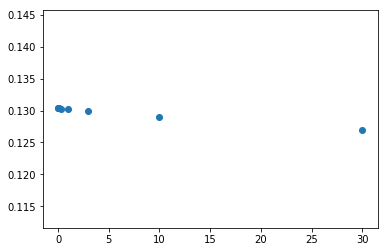

In [34]:
from sklearn.linear_model import Ridge
# Evaluate model performance using root mean square error
from sklearn.metrics import mean_squared_error
rmse=[]
# check the below alpha values for Ridge Regression
alpha=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(X_train, y_train)
    predict=ridge.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(predict, y_test)))
print(rmse)
plt.scatter(alpha, rmse)


I decided to use 30 as my alpha because it seems like it is the lowest on the chart above.

In [35]:
# Use alpha=30 to predict the test data
ridge=Ridge(alpha=30)
# Use all training data to fit the model
ridge.fit(x, y)
predictions = ridge.predict(test)
predictions = np.expm1(predictions)
submission = pd.DataFrame({'Id':Id,'SalePrice':predictions})
submission.head()
submission.to_csv("submission1.csv",index=False)

Adding the total area of the house and using the ridge model improved my score by quite a bit, my new submission scored 0.13512

The last model I want to try is XGBoost. The name caught my attention, and after reading this [page](https://www.kaggle.com/dansbecker/xgboost"XGBoost Info") I knew that I had to give it a try. XGBoost makes predictions based on the previous predictions, as it builds new models, then adds the new models to an ensemble model. 

In [36]:
from xgboost import XGBRegressor
my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(x, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [37]:
predictions = my_model.predict(x)
mse = mean_squared_error(y, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.08667185248514085


In [38]:
predictions = my_model.predict(test)
predictions = np.expm1(predictions)
predictions

array([122468.13, 156126.52, 183344.78, ..., 172060.6 , 116704.72,
       228631.33], dtype=float32)

In [39]:
submission = pd.DataFrame({'Id':Id,'SalePrice':predictions})
submission.to_csv("submission2.csv",index=False)

This last submission scored a 0.13996, which I think I could improve if I tweaked the hyper parameters, instead of just using XGBoost out of the box.

In [43]:
regr = XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.05,
                 max_depth=6,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)
regr.fit(x, y)
y_pred_xgb = regr.predict(test)
predictions = np.expm1(y_pred_xgb)

In [44]:
submission = pd.DataFrame({'Id':Id,'SalePrice':predictions})
submission.to_csv("submission3.csv",index=False)

I didn't have time to do a grid search on my data but I found some hyper parameters sugested by this[https://www.kaggle.com/litachil/try-the-xgboost] Kaggle user. I tried their parameters and it boosted the score to my best score yet 0.12600. 

In the future I would like to spend some more time to do my own cv on the data that I cleaned using grid search. 